# **Airline Passenger Satisfaction**

**The goal of creating an ML (Machine Learning) model using this dataset could be to predict or understand the factors that contribute most significantly to customer satisfaction or dissatisfaction with their flight experience.**


**Data Source :**  https://www.kaggle.com/datasets/mohamedhamdymady/airline-passenger-satisfaction?resource=download


* **ID:** Unique identifier for each customer.
* **Gender:** The gender of the customer, either male or female.
* **Age:** Age of the customer.
* **Customer Type:** Specifies if the customer is a first-time or returning customer.
* **Type of Travel:** Indicates the purpose of travel, specified as business travel.
* **Class:** Refers to the class of service availed by the customer, all in the Business class.
* **Flight Distance:** The distance (in miles) of the flight taken by the customer.
* **Departure Delay:** Time (in minutes) by which the departure was delayed.
* **Arrival Delay:** Time (in minutes) by which the arrival was delayed.
* **Departure and Arrival Time Convenience:** Subjective rating (scale 1-5) for the convenience of departure and arrival times.
* **Ease of Online Booking:** Rating (scale 1-5) indicating the ease of booking tickets online.
* **Check-in Service:** Rating (scale 1-5) reflecting the quality of the check-in service.
* **Online Boarding:** Rating (scale 1-5) depicting the experience of boarding procedures conducted online.
* **Gate Location:** Customer's rating (scale 1-5) based on the gate's location convenience.
* **On-board Service:** Rating (scale 1-5) given to the service provided on board the flight.
* **Seat Comfort:** Customer's satisfaction rating (scale 1-5) with the comfort level of the seats.
* **Leg Room Service:** Rating (scale 1-5) regarding the legroom comfort and service.
* **Cleanliness:** Rating (scale 1-5) reflecting the cleanliness of the flight.
* **Food and Drink:** Rating (scale 1-5) indicating satisfaction with the food and drink options.
* **In-flight Service:** Rating (scale 1-5) depicting the overall in-flight service experience.
* **In-flight Wifi Service:** Rating (scale 1-5) assessing the satisfaction with in-flight wifi service, if provided.
* **In-flight Entertainment:** Rating (scale 1-5) reflecting the satisfaction with in-flight entertainment options.
* **Baggage Handling:** Rating (scale 1-5) regarding satisfaction with baggage handling.
* **Overall Satisfaction Points:** Aggregate points calculated based on the individual ratings given by the customer.
* **Satisfaction:** A categorical assessment indicating if the customer was either satisfied or neutral/dissatisfied with their overall experience.






**step 1 :** Importing necessary libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

**step 1.1 :** loading the data from source 

In [35]:
data = pd.read_csv(r"/root/MLOPS_PROJEST_WSL/Airline-Passenger-Satisfaction/project/data/01_raw/airline_passenger_satisfaction.csv")
data.head(5)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


Shape of the data

In [36]:
data.shape

(129880, 24)

Basic information of the data -  there are three types od data type : int, float, object

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

Basic Statistics - Mean, Standard Deviation, Minimum, 25th Percentile, Median, 75th Percentile, Maximum for each attribute

In [38]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Dublicates - no dublicates in the data

In [39]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
129875    False
129876    False
129877    False
129878    False
129879    False
Length: 129880, dtype: bool

It seems only in column **Arrival Delay** has null values od count 393

In [40]:
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

**step 2 :** Data Vizvalization  - Univariate Analysis:

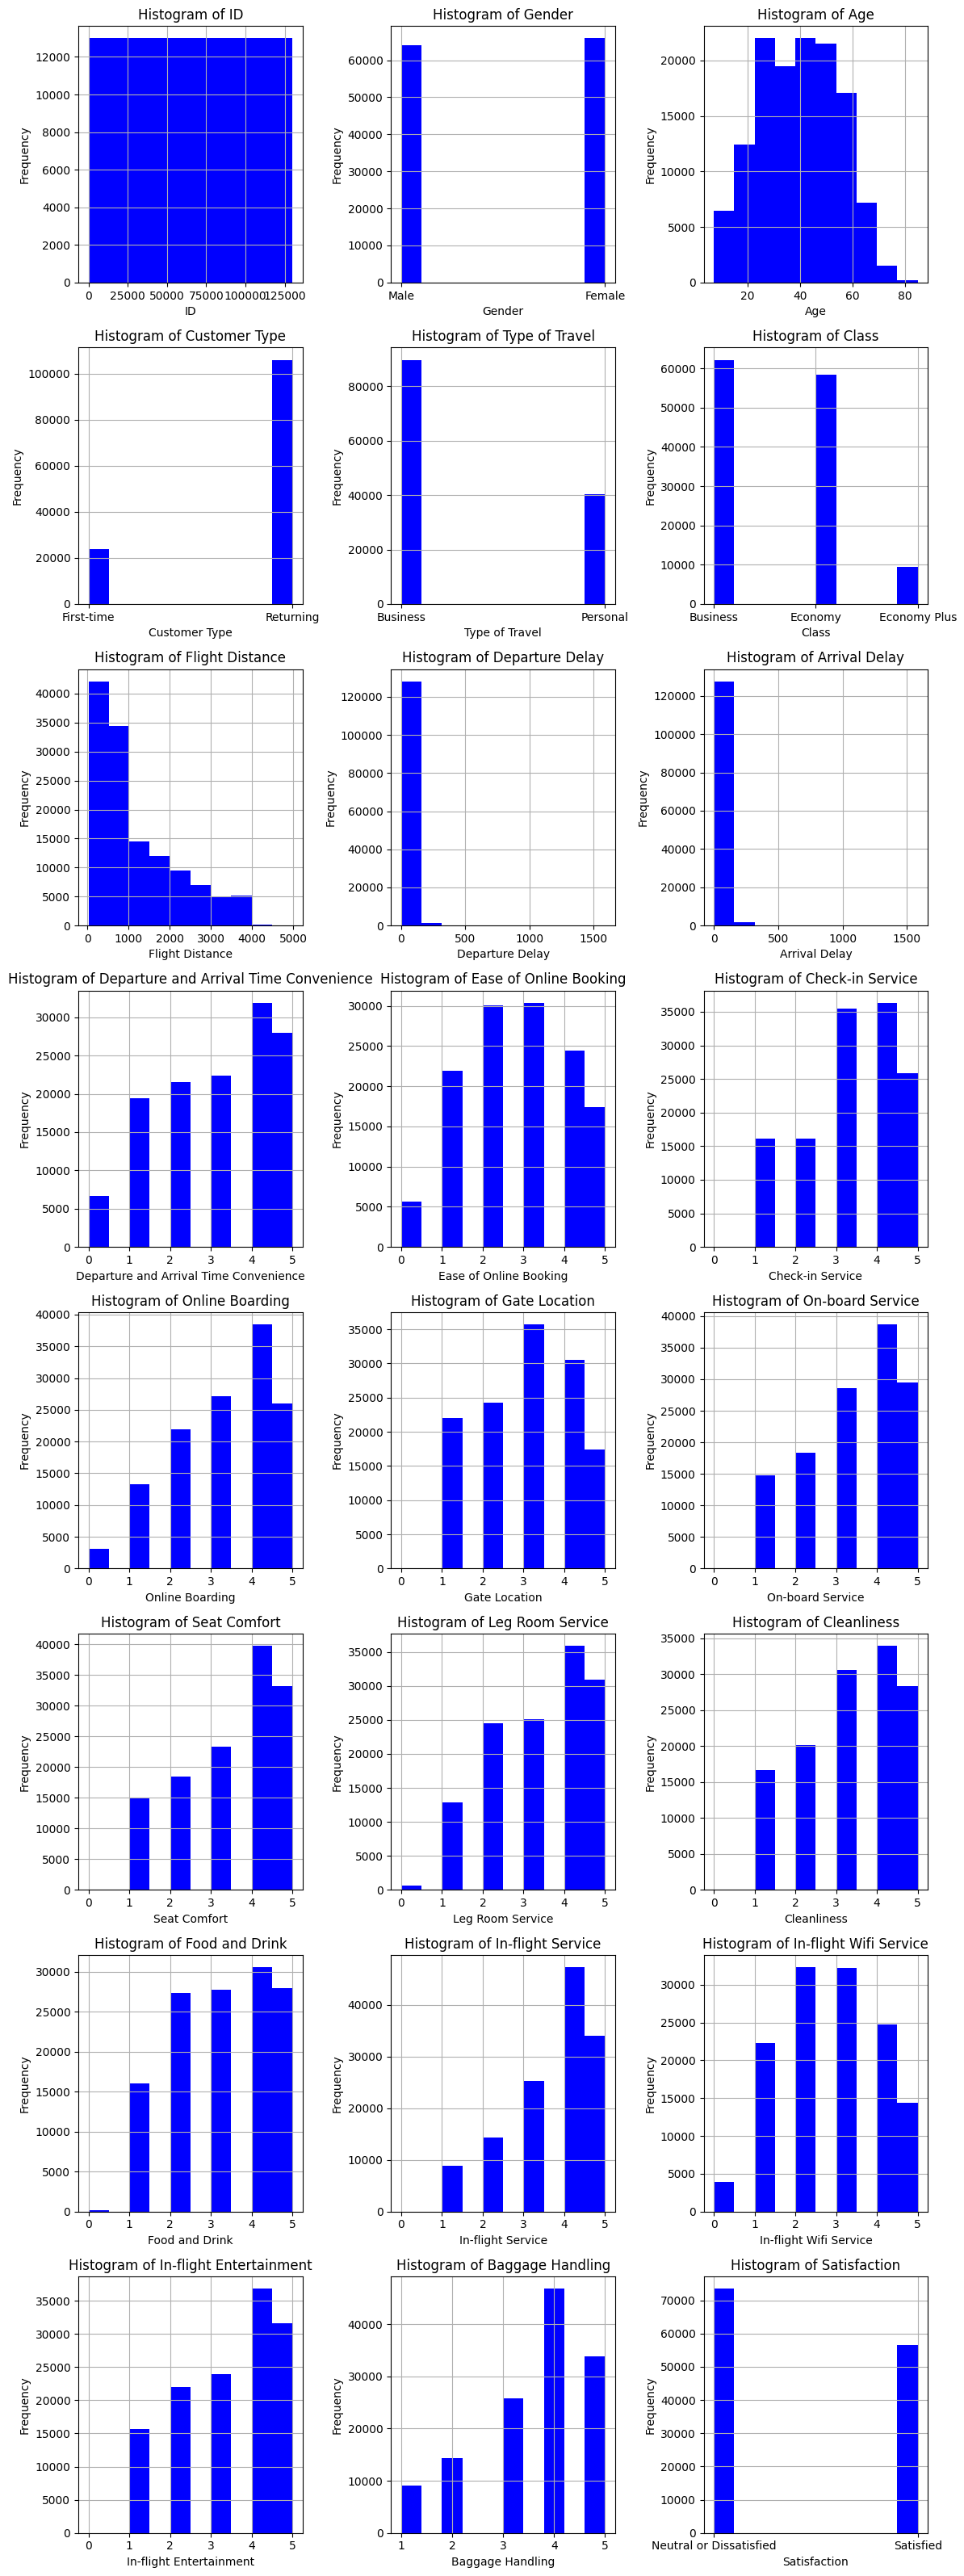

In [41]:
import matplotlib.pyplot as plt 

# Calculate number of rows needed for the subplots
num_columns = len(data.columns)
num_rows = (num_columns + 2) // 3  # Ceiling division to determine the number of rows

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))  # Create subplots

# Loop through each column and create histograms in subplots
for i, column in enumerate(data.columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(data[column], bins=10, color="blue")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.set_title(f"Histogram of {column}")
    ax.grid(True)

# Adjust layout and spacing
plt.tight_layout()
plt.show()


* It shows that satisfied count is less compared to Neutral or Dissatisfied
* Both gender of Male and female are not equal but almost equal in count, Female count is little bit high
* Age column shows normal distribution, the age between 20-60 are in high count
* The data contains high count in returning customers, only few with first time customers
* The Business trips are more high than personal trip
* In Class column economy plus passengers are in less count, other two class passengers are in high count, almost equal
* The flight distance is positively skewed
* It seems only two columns are numerical column, others all categorical

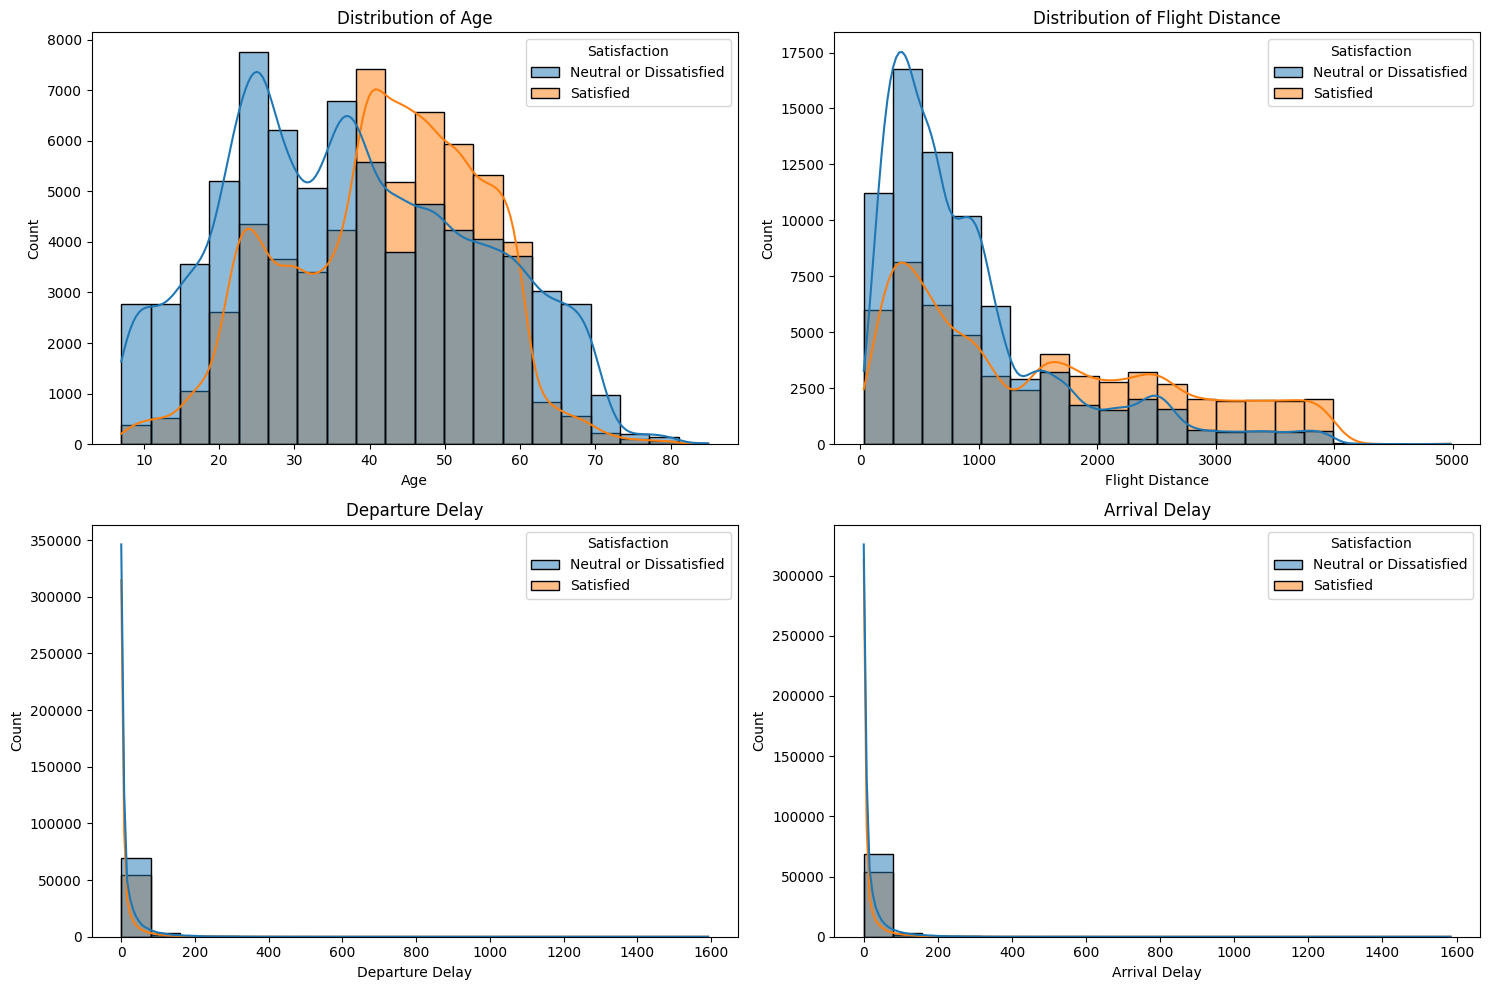

In [42]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 10))

# Creating subplots side by side for Age and Flight Distance
plt.subplot(2, 2, 1)
sns.histplot(data=data, x="Age", bins=20, kde=True, hue="Satisfaction")
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(data=data, x="Flight Distance", bins=20, kde=True, hue="Satisfaction")
plt.title('Distribution of Flight Distance')

plt.subplot(2, 2, 3)
sns.histplot(data=data, x="Departure Delay", bins=20, kde=True, hue="Satisfaction")
plt.title("Departure Delay")

plt.subplot(2, 2, 4)
sns.histplot(data=data, x="Arrival Delay", bins=20, kde=True, hue="Satisfaction")
plt.title("Arrival Delay")

plt.tight_layout()
plt.show()


* Age group between 40-60 are highly satisfied 
* In flight distance, passengers who takes short distance travel are highly satisfied

vis - Bivariate Analysis:

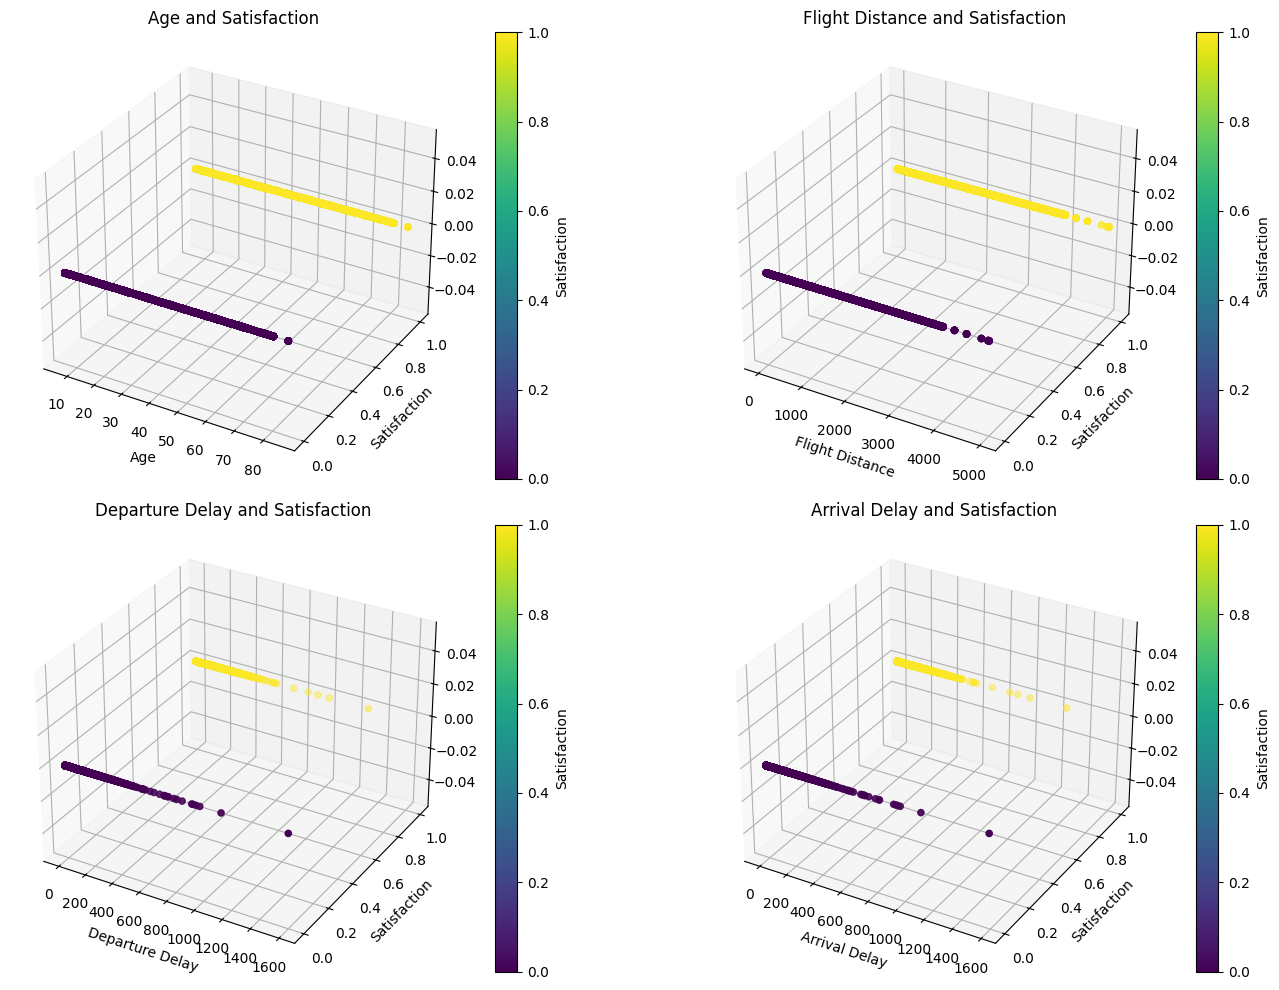

In [43]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder


# Convert categorical 'Satisfaction' data to numerical labels
label_encoder = LabelEncoder()
data['Satisfaction_Label'] = label_encoder.fit_transform(data['Satisfaction'])

fig = plt.figure(figsize=(15, 10))

# Creating 3D scatterplots
ax1 = fig.add_subplot(221, projection='3d')
scatter1 = ax1.scatter(data["Age"], data["Satisfaction_Label"], c=data["Satisfaction_Label"], cmap='viridis')
ax1.set_xlabel('Age')
ax1.set_ylabel('Satisfaction')
ax1.set_title('Age and Satisfaction')
plt.colorbar(scatter1, ax=ax1, label='Satisfaction')

# Creating 3D scatterplot for Flight Distance, Satisfaction, and Seat Comfort
ax2 = fig.add_subplot(222, projection='3d')
scatter2 = ax2.scatter(data["Flight Distance"], data["Satisfaction_Label"], c=data["Satisfaction_Label"], cmap='viridis')
ax2.set_xlabel('Flight Distance')
ax2.set_ylabel('Satisfaction')
ax2.set_title('Flight Distance and Satisfaction')
plt.colorbar(scatter2, ax=ax2, label='Satisfaction')

# Creating 3D scatterplot for Departure Delay, Satisfaction, and Seat Comfort
ax3 = fig.add_subplot(223, projection='3d')
scatter3 = ax3.scatter(data["Departure Delay"], data["Satisfaction_Label"], c=data["Satisfaction_Label"], cmap='viridis')
ax3.set_xlabel('Departure Delay')
ax3.set_ylabel('Satisfaction')
ax3.set_title('Departure Delay and Satisfaction')
plt.colorbar(scatter3, ax=ax3, label='Satisfaction')

# Creating 3D scatterplot for Arrival Delay, Satisfaction, and Seat Comfort
ax4 = fig.add_subplot(224, projection='3d')
scatter4 = ax4.scatter(data["Arrival Delay"], data["Satisfaction_Label"], c=data["Satisfaction_Label"], cmap='viridis')
ax4.set_xlabel('Arrival Delay')
ax4.set_ylabel('Satisfaction')
ax4.set_title('Arrival Delay and Satisfaction')
plt.colorbar(scatter4, ax=ax4, label='Satisfaction')

plt.tight_layout()
plt.show()


* it shows the numerical data are linearly classified

In [45]:
data.head(5)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Satisfaction_Label
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,0
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,1
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,1
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,1
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,1


**Multivariate Analysis:**

In [64]:
cat_columns = ["Gender", "Customer Type", "Type of Travel", "Class"]

# Create a new DataFrame containing only the selected categorical columns
df_categorical = data[cat_columns]

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each column in the DataFrame
encoded_df = df_categorical.apply(encoder.fit_transform)

# Replace categorical columns in the original DataFrame with encoded values
data[cat_columns] = encoded_df

data = data.drop(columns="Satisfaction", axis=1)

data.head(5)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction_Label
0,1,1,48,0,0,0,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,0,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,0,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,0,0,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,0,0,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


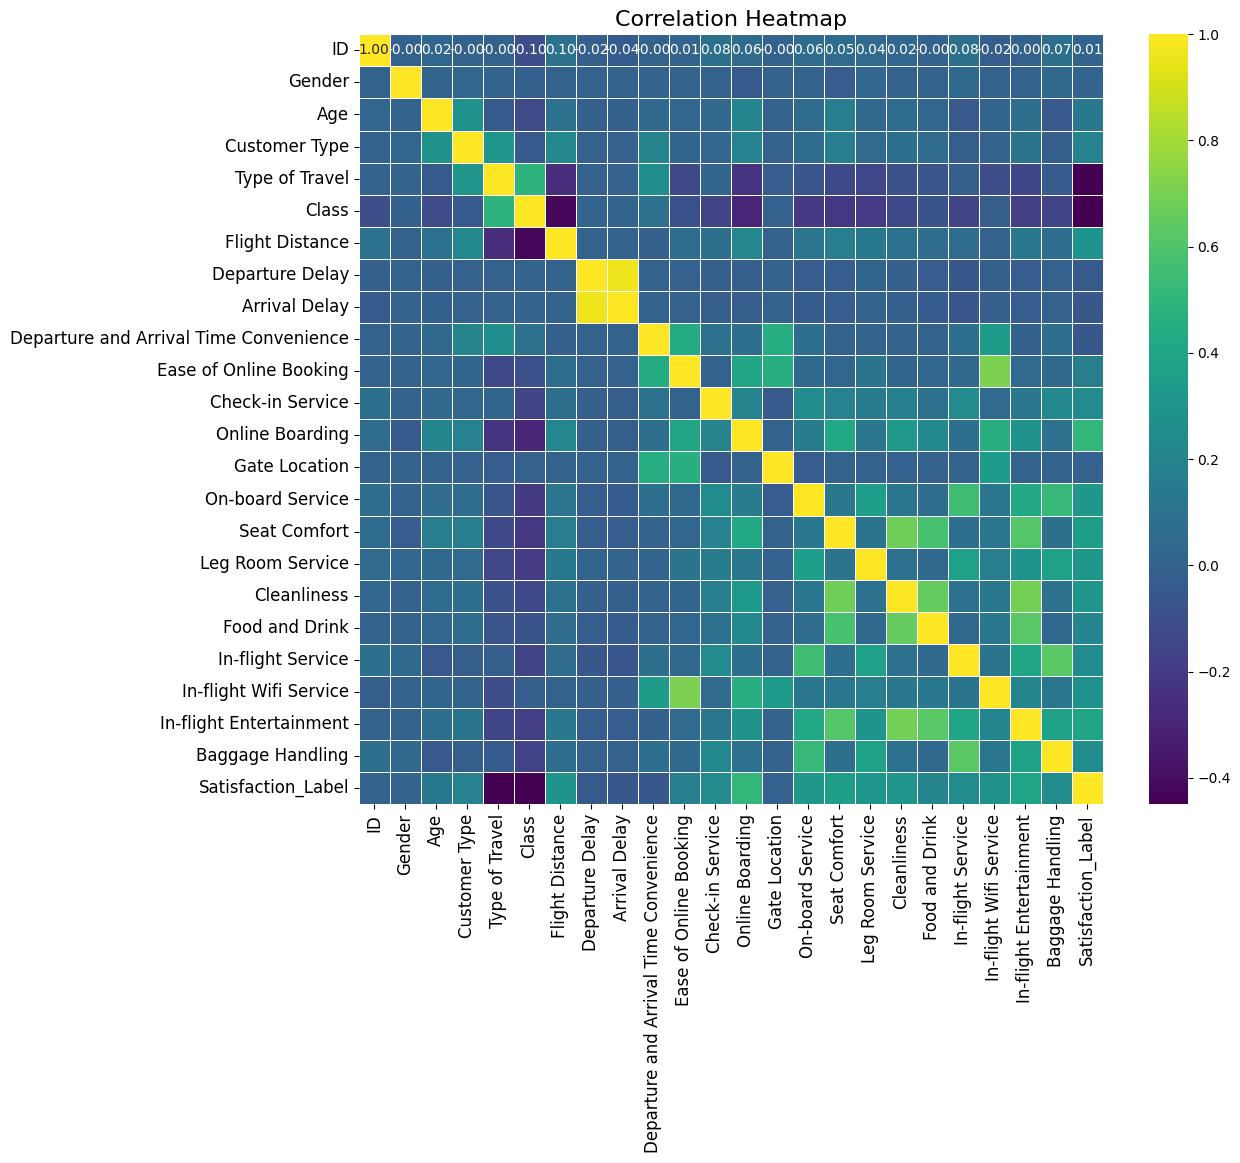

In [67]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Create a larger figure for better visualization
plt.figure(figsize=(12, 10))

# Customize the color palette and add lines between squares
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5, linecolor='white')

# Set title and adjust font sizes
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the updated heatmap
plt.show()

In [92]:
for column in data.columns[:-1]:
    if data[column].corr(data["Satisfaction_Label"]) < 0:
        print(column)  


Type of Travel
Class
Departure Delay
Arrival Delay
Departure and Arrival Time Convenience
Gate Location


In [91]:
for column in data.columns[:-1]:
    if data[column].corr(data["Satisfaction_Label"]) > 0.3:
        print(column)  


Online Boarding
On-board Service
Seat Comfort
Leg Room Service
Cleanliness
In-flight Entertainment


* From the correlation report we can see, the negative correlation from these columns 
 Type of Travel, 
 Class, 
 Departure Delay,
 Arrival Delay,
 Departure and Arrival Time Convenience,
 Gate Location,

 * in these data there is high correlation towards target 

**Outlier Detection - using boxplot**

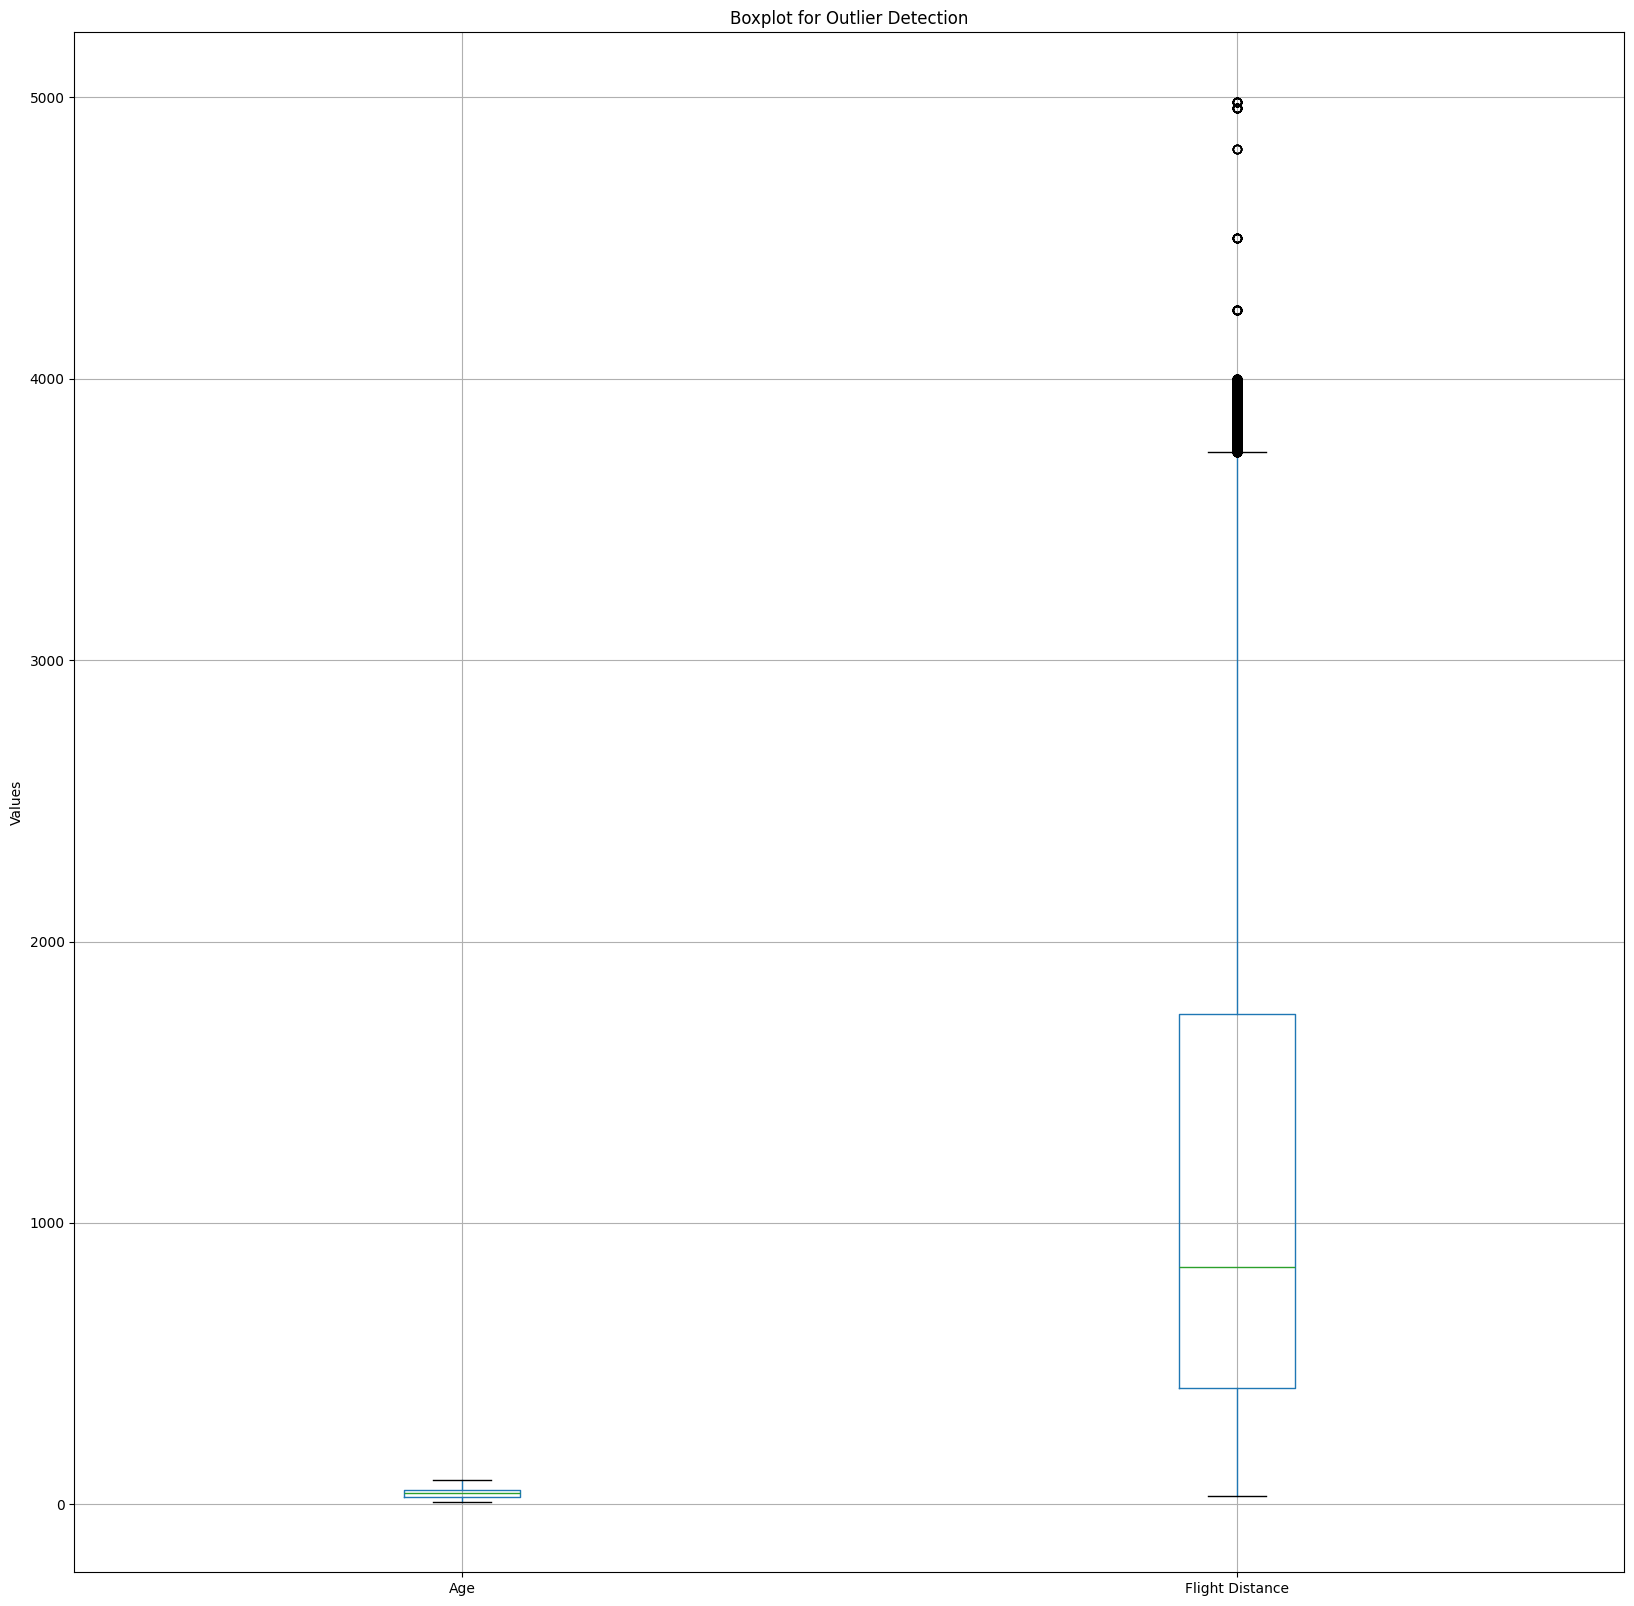

In [106]:
num_columns = ["Age", "Flight Distance"]
df = pd.DataFrame({key: data[key] for key in num_columns})

# Create box plots for outlier detection
plt.figure(figsize=(20, 20))
df.boxplot(column=num_columns)
plt.title('Boxplot for Outlier Detection')
plt.ylabel('Values')
plt.show()

In [104]:
num_columns = ["Age", "Flight Distance"]
df = pd.DataFrame({key: data[key] for key in num_columns})

for column in df.columns:
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr  
    print(f"{column}: Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Age: Lower Bound: -9.0, Upper Bound: 87.0
Flight Distance: Lower Bound: -1581.0, Upper Bound: 3739.0


* It shows there are outliers

In [ ]:
data.nunique()

ID                                        129880
Gender                                         2
Age                                           75
Customer Type                                  2
Type of Travel                                 2
Class                                          3
Flight Distance                             3821
Departure Delay                              466
Arrival Delay                                472
Departure and Arrival Time Convenience         6
Ease of Online Booking                         6
Check-in Service                               6
Online Boarding                                6
Gate Location                                  6
On-board Service                               6
Seat Comfort                                   6
Leg Room Service                               6
Cleanliness                                    6
Food and Drink                                 6
In-flight Service                              6
In-flight Wifi Servi